# PATIENT INFORMATION & HEALTH INSURANCE COST
## **EXPLORATORY DATA ANALYSIS (1)**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings 
warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_csv("insurance.csv")
data = original_data.copy()

In [3]:
print(f"\n Total number of features: {data.shape[1]}")
print(f" Total number of observations: {data.shape[0]}\n")

data.head()


 Total number of features: 7
 Total number of observations: 1338



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



 Total number of missing data: 0



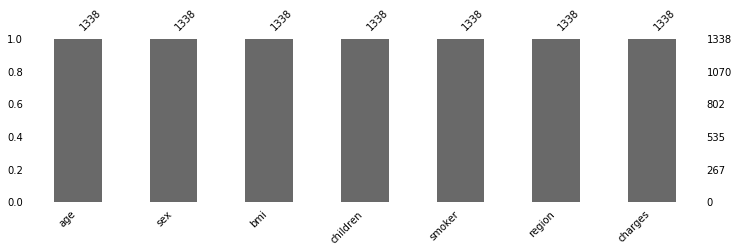

In [4]:
print(f"\n Total number of missing data: {data.isnull().sum().sum()}\n")

msno.bar(data, figsize = (12,3), fontsize = 10);

In [5]:
# Data types of features

data.dtypes.to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,int64,object,float64,int64,object,object,float64


In [6]:
# Examining the statistics of the data set

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


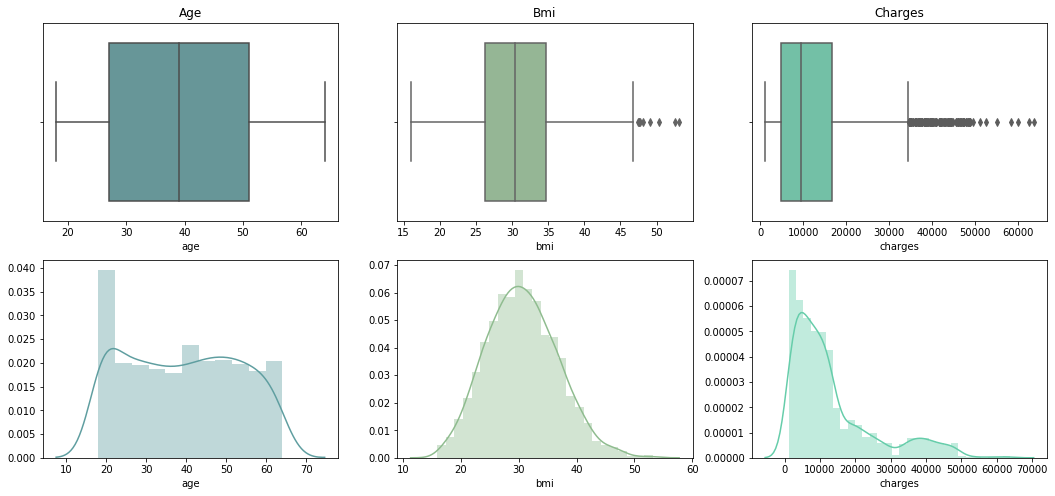

In [7]:
features = ["age", "bmi", "charges"]
colors = ["#5F9EA0", "#8FBC8F", "#66CDAA"]
plot_position = 231

fig = plt.figure(figsize = (18,8))

for feature, color in zip(features, colors):
    ax = fig.add_subplot(plot_position)
    ax.set_title(feature.capitalize())
    sns.boxplot(x = data[feature], color = color)
    ax = fig.add_subplot(plot_position + 3)
    sns.distplot(data[feature], color = color)
    plot_position += 1

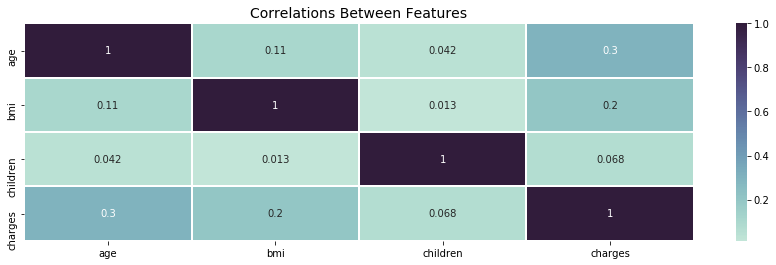

In [8]:
palette = sns.cubehelix_palette(start = .5, rot = -.5, as_cmap = True)
correlation = data.corr()

fig = plt.subplots(figsize = (15,4))
ax = sns.heatmap(correlation, 
                 annot = True,
                 cmap = palette,
                 linewidths = 1)
ax.set_title("Correlations Between Features", fontsize = 14);

## **Relationship Between Features**

### **"Sex" and "Charges"**


Total number of male: 676
Total number of female: 662



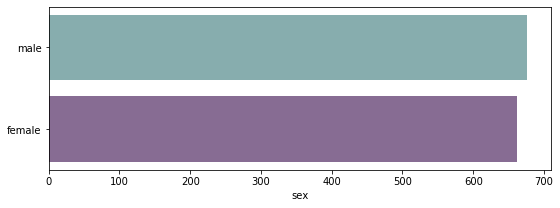

In [9]:
female = data[data["sex"] == "female"]
male = data[data["sex"] == "male"]

print(f"\nTotal number of male: {len(male)}")
print(f"Total number of female: {len(female)}\n")


colors = ["#80B3B5", "#89659A"]
sns.set_palette(sns.color_palette(colors))

fig = plt.subplots(figsize = (9,3))
ax = sns.barplot(x = data["sex"].value_counts(), 
                 y = data["sex"].value_counts().index);

In [10]:
female["charges"].agg(["min","max","mean","median","std"]).to_frame().T

,min,max,mean,median,std
charges,1607.5101,63770.42801,12569.578844,9412.9625,11128.703801


In [11]:
male["charges"].agg(["min","max","mean","median","std"]).to_frame().T

,min,max,mean,median,std
charges,1121.8739,62592.87309,13956.751178,9369.61575,12971.025915


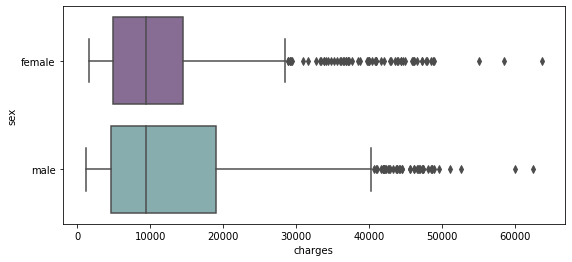

In [12]:
fig, ax = plt.subplots(figsize = (9,4))
colors = ["#89659A", "#80B3B5"]
sns.boxplot(x = "charges", y = "sex", data = data, palette = colors);

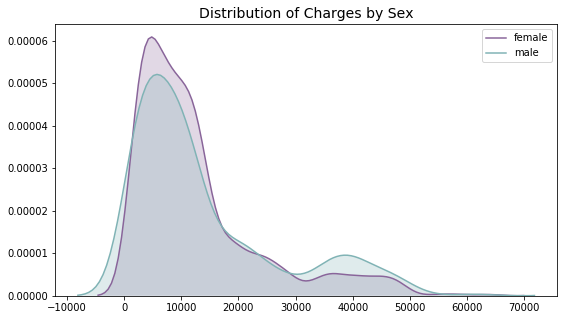

In [13]:
fig, ax = plt.subplots(figsize = (9,5))

sns.kdeplot(female["charges"], label = "female", color = "#89659A", shade = True)
sns.kdeplot(male["charges"], label = "male", color = "#80B3B5", shade = True)

ax.set_title("Distribution of Charges by Sex", fontsize = 14);

### **"Sex" and "Age"**

In [14]:
female["age"].agg(["min","max","mean","median","std"]).to_frame().T

,min,max,mean,median,std
age,18.0,64.0,39.503021,40.0,14.054223


In [15]:
male["age"].agg(["min","max","mean","median","std"]).to_frame().T

,min,max,mean,median,std
age,18.0,64.0,38.91716,39.0,14.050141


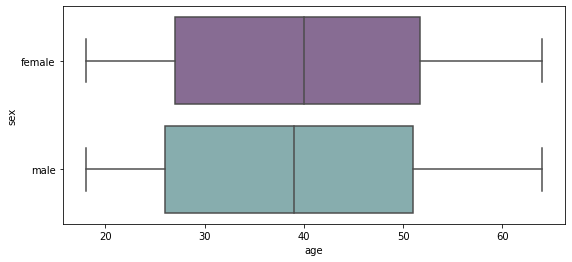

In [16]:
fig, ax = plt.subplots(figsize = (9,4))
colors = ["#89659A", "#80B3B5"]
sns.boxplot(x = "age", y = "sex", data = data, palette = colors);

### **"Smoker" and "Charges"**


Total number of non-smokers: 1064
Total number of smokers: 274



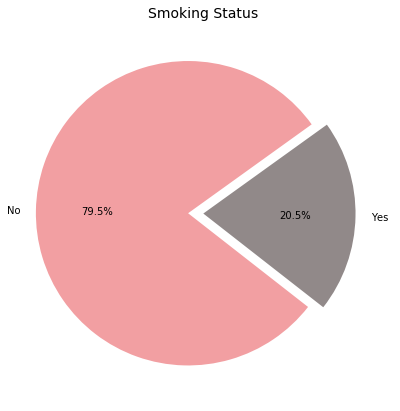

In [17]:
smoker = data[data["smoker"] == "yes"]
non_smoker = data[data["smoker"] == "no"]

smoking_status = [len(smoker), len(non_smoker)]

print(f"\nTotal number of non-smokers: {smoking_status[1]}")
print(f"Total number of smokers: {smoking_status[0]}\n")

fig, ax = plt.subplots(figsize = (7,7))

ax.pie(smoking_status, 
       colors = ["#918989","#F29FA2"], 
       labels = ["Yes", "No"],
       startangle = -38,
       explode = [0, 0.1], 
       autopct='%1.1f%%')

ax.set_title("Smoking Status", fontsize = 14);

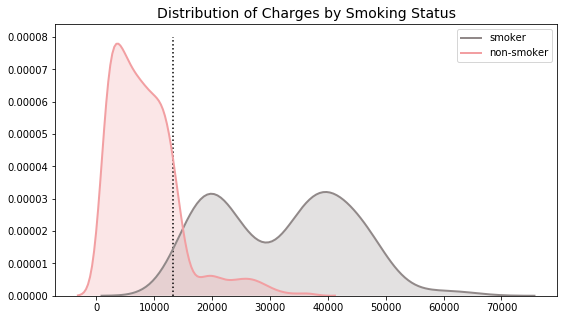

In [18]:
fig, ax = plt.subplots(figsize = (9,5))

sns.kdeplot(smoker["charges"],
            label = "smoker",
            color = "#918989",
            lw = 2,
            shade = True)
plt.vlines(x = data["charges"].mean(), linestyles = "dotted", ymin = 0, ymax = 0.00008);

sns.kdeplot(non_smoker["charges"],
            label = "non-smoker",
            color = "#F29FA2",
            lw = 2,
            shade = True)

ax.set_title("Distribution of Charges by Smoking Status", fontsize = 14);

### **"Region" and "Charges"**

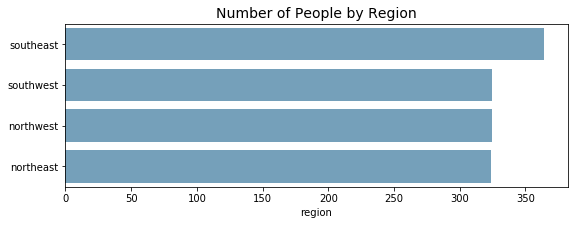

In [19]:
colors2 = ["#69A3C6"]
sns.set_palette(sns.color_palette(colors2))

fig, ax = plt.subplots(figsize = (9,3))

(sns.barplot(x = data["region"].value_counts(), 
             y = data["region"].value_counts().index,
             palette = colors2,
             ax = ax)
    .set_title("Number of People by Region", fontsize = 14));

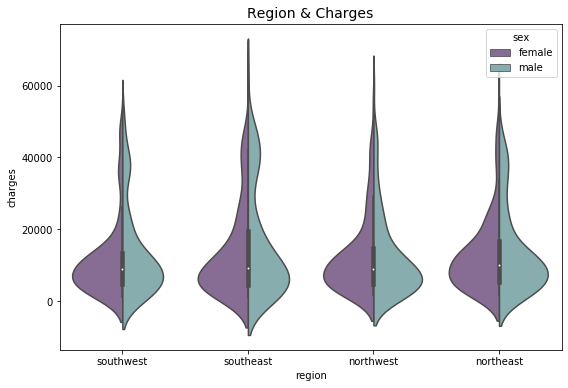

In [20]:
plt.figure(figsize = (9,6))
sns.violinplot(x = "region", y = "charges", hue = "sex", data = data, palette = colors, split = True)
plt.title("Region & Charges", fontsize = 14);

### **"Age" and "Charges"**

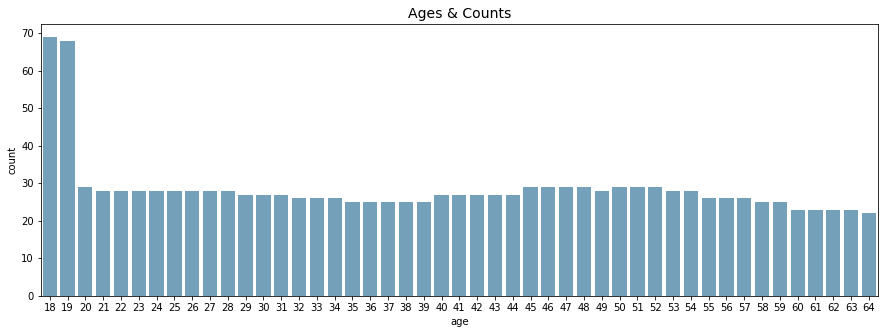

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
(sns.countplot(x = "age", 
               data = data, 
               color = "#69A3C6")
    .set_title("Ages & Counts", fontsize = 14));

In [22]:
ages = np.arange(18,65)
charge_average = []

for num in np.arange(18,65):
    if num in data["age"]:        
        charge_average.append(data[data["age"] == num]["charges"].mean())

charge_average_df = pd.DataFrame(charge_average)
charge_average_df["age"] = ages
charge_average_df["charge_mean"] = charge_average
charge_average_df.drop(labels = 0, axis = 1, inplace = True)

In [23]:
charge_average_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,18.000000,19.000000,20.000000,21.00000,22.000000,23.00000,24.000000,25.000000,26.000000,27.000000
charge_mean,7086.217556,9747.909335,10159.697736,4730.46433,10012.932802,12419.82004,10648.015962,9838.365311,6133.825309,12184.701721


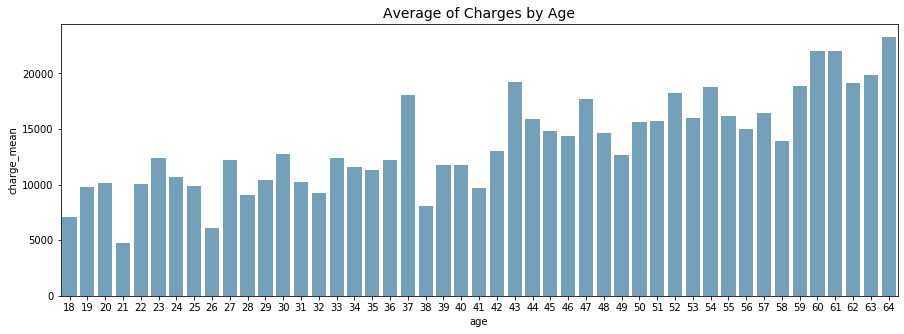

In [24]:
fig, ax = plt.subplots(figsize = (15,5))

(sns.barplot(x = "age", 
             y = "charge_mean",
             data = charge_average_df, 
             palette = colors2)
   .set_title("Average of Charges by Age", fontsize = 14));

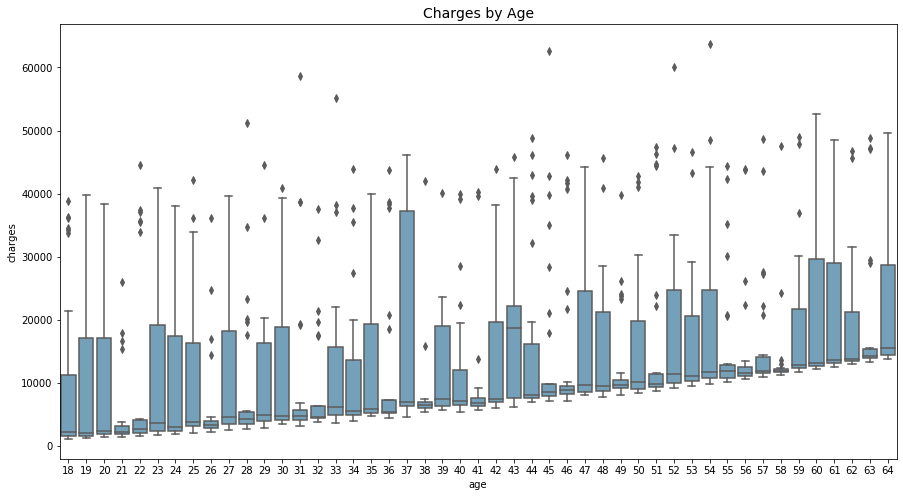

In [25]:
fig, ax = plt.subplots(figsize = (15,8))

(sns.boxplot(x = "age", 
             y = "charges",
             data = data,
             palette = colors2)
   .set_title("Charges by Age", fontsize = 14));

### **"Children" and  "Charges"**

In [26]:
pd.crosstab(data["children"], data["age"])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
children,,,,,,,,,,,,,,,,,,,,,
0,51,50,17,16,18,13,23,12,10,14,...,13,16,16,21,10,19,15,16,17,13
1,9,11,6,5,4,6,1,6,9,6,...,5,4,6,2,6,2,3,3,2,3
2,6,5,3,5,2,5,1,4,7,3,...,4,3,3,2,3,0,2,2,1,4
3,2,1,1,1,4,4,2,3,1,5,...,4,2,0,0,6,2,2,2,3,2
4,1,0,0,1,0,0,1,2,1,0,...,0,1,1,0,0,0,1,0,0,0
5,0,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


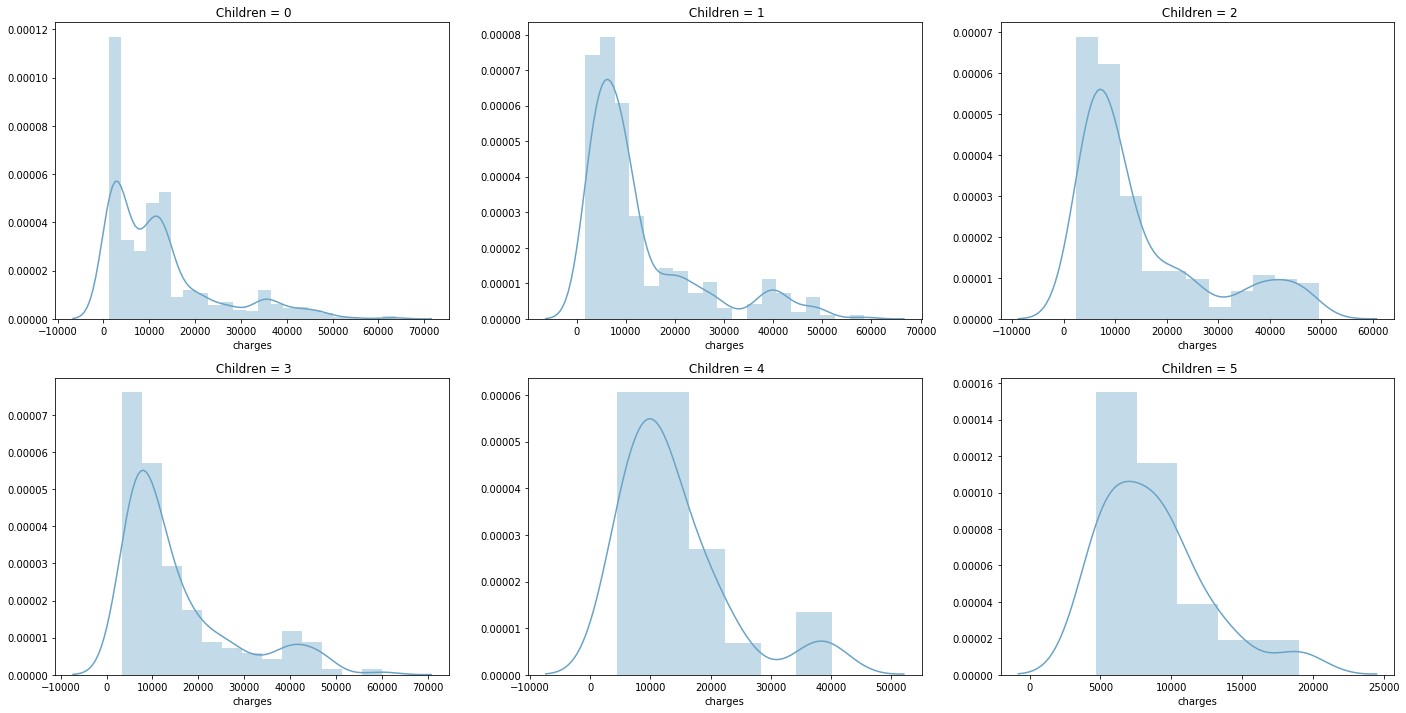

In [27]:
fig = plt.figure(figsize = (24,12))
plot_positions = np.arange(231, 237)

for num, position in zip(sorted(data["children"].unique()), plot_positions):
    ax = fig.add_subplot(position)
    ax.set_title(f" Children = {num}")
    sns.distplot(data[data["children"] == num]["charges"], color = "#69A3C6")

### **"BMI" and  "Charges"**

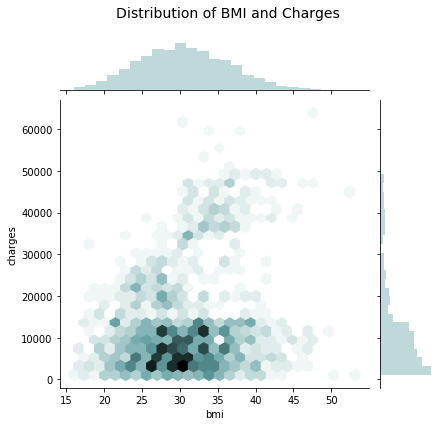

In [28]:
bmi_plot = sns.jointplot(x = "bmi",
                         y = "charges",
                         data = data,
                         kind = "hex", 
                         color = "#5F9EA0")

bmi_plot.fig.suptitle("Distribution of BMI and Charges", size = 14);
bmi_plot.fig.subplots_adjust(top = 0.9)

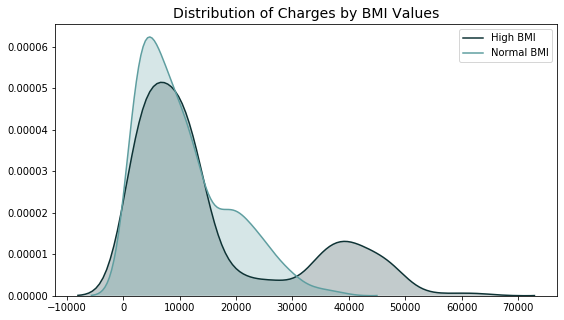

In [29]:
fig, ax = plt.subplots(figsize = (9,5))

sns.kdeplot(data[data["bmi"] > 30]["charges"], 
            shade = True, 
            color = "#0E3335", 
            label = "High BMI")
sns.kdeplot(data[data["bmi"] < 30]["charges"], 
            shade = True, 
            color = "#5F9EA0", 
            label = "Normal BMI")
ax.set_title("Distribution of Charges by BMI Values", fontsize = 14);

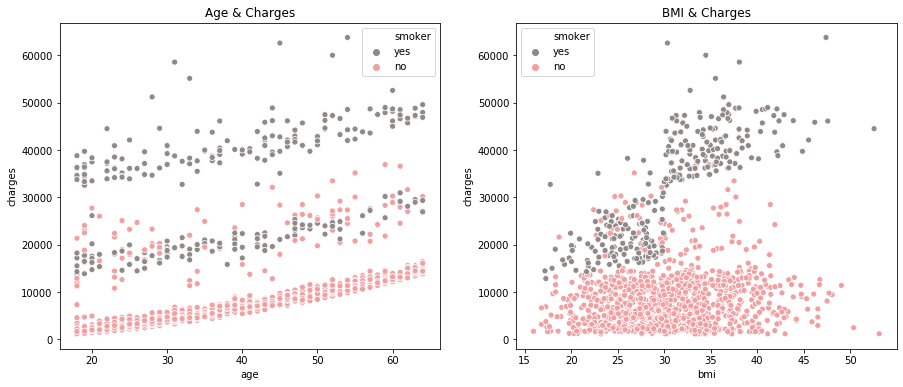

In [30]:
smoker_colors = ["#918989","#F29FA2"]

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(121)
sns.scatterplot(x = "age", y = "charges", data = data, palette = smoker_colors, hue = "smoker")
ax.set_title("Age & Charges")

ax = fig.add_subplot(122)
sns.scatterplot(x = "bmi", y = "charges", data = data, palette = smoker_colors, hue = "smoker")
ax.set_title("BMI & Charges");